# Confusion matrices final single-source localization model 
Confusion matrices over azimuth and elevation for the final single-source localization model (zero-shot trasfer model)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import keras

# Array of dictionaries of the labels at their indeces
azimuth_values = [270, 280, 290, 300, 310, 320, 330, 340, 350, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
elevation_values= [60, 45, 30, 20, 10, 0, -10, -20, -30, -45]
positions_dict = []
for az in azimuth_values:
  for el in elevation_values:
    positions_dict.append({'azimuth': az, 'elevation': el})

# putting predictions in bins of azimuth
def to_az(labels):
    to_az = []
    for t in labels:
        label_az = t // 10
        to_az.append(label_az)
    to_az = np.array(to_az)
    return to_az

#putting predictions in bins of elevation
def to_el(labels):
    to_el = []
    for t in labels:
        label_el = t % 10
        to_el.append(label_el)
    to_el = np.array(to_el)
    return to_el

# take index of max probability class from the output probability array: creates array of predicted labels
def max_class_pred(predictions):
    pred_class = []
    prob_class = []
    for p in predictions:
        max_prob = max(p)
        prob_class.append(max_prob)
        label_ind = np.where(p == max_prob)[0][0]
        pred_class.append(label_ind)
    pred_class = np.array(pred_class)
    prob_class = np.array(prob_class)
    return pred_class, prob_class

#plotting confusion matrices 
def confusion_matrices(true_labels, predict_labels):
    print("total accuracy: ", metrics.accuracy_score(true_labels, predict_labels))
    
    true_az = to_az(true_labels)
    pred_az = to_az(predict_labels)
    true_el = to_el(true_labels)
    pred_el = to_el(predict_labels)
    print("accuracy azimuth: ", metrics.accuracy_score(true_az, pred_az))
    print("accuracy elevation: ", metrics.accuracy_score(true_el, pred_el))

    #create figure
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17.5, 8), constrained_layout = True)
    fig.suptitle(f'Confusion matrices', size = 20)
    ax1.set_title("Azimuth", fontsize = 16)
    ax2.set_title("Elevation", fontsize = 16)
    
    cma_display = metrics.ConfusionMatrixDisplay.from_predictions(true_az, 
                                                                  pred_az, 
                                                                  display_labels = [270, 280, 290, 300, 310, 320, 330, 340, 350, 0, 
                                                                  10, 20, 30, 40, 50, 60, 70, 80, 90],
                                                                  xticks_rotation='vertical', 
                                                                  include_values = True, 
                                                                  ax = ax1, 
                                                                  normalize = 'true', 
                                                                  values_format= '.0%')

    
    cm_display = metrics.ConfusionMatrixDisplay.from_predictions(true_el, 
                                                                 pred_el, 
                                                                 display_labels = [60, 45, 30, 20, 10, 0, -10, -20, -30, -45],
                                                                 xticks_rotation='vertical', 
                                                                 include_values = True, 
                                                                 ax = ax2, 
                                                                 normalize = 'true', 
                                                                 values_format= '.0%')
    

    plt.show()    


total accuracy:  0.0044229149115417015
accuracy azimuth:  0.04812552653748947
accuracy elevation:  0.09403959561920809


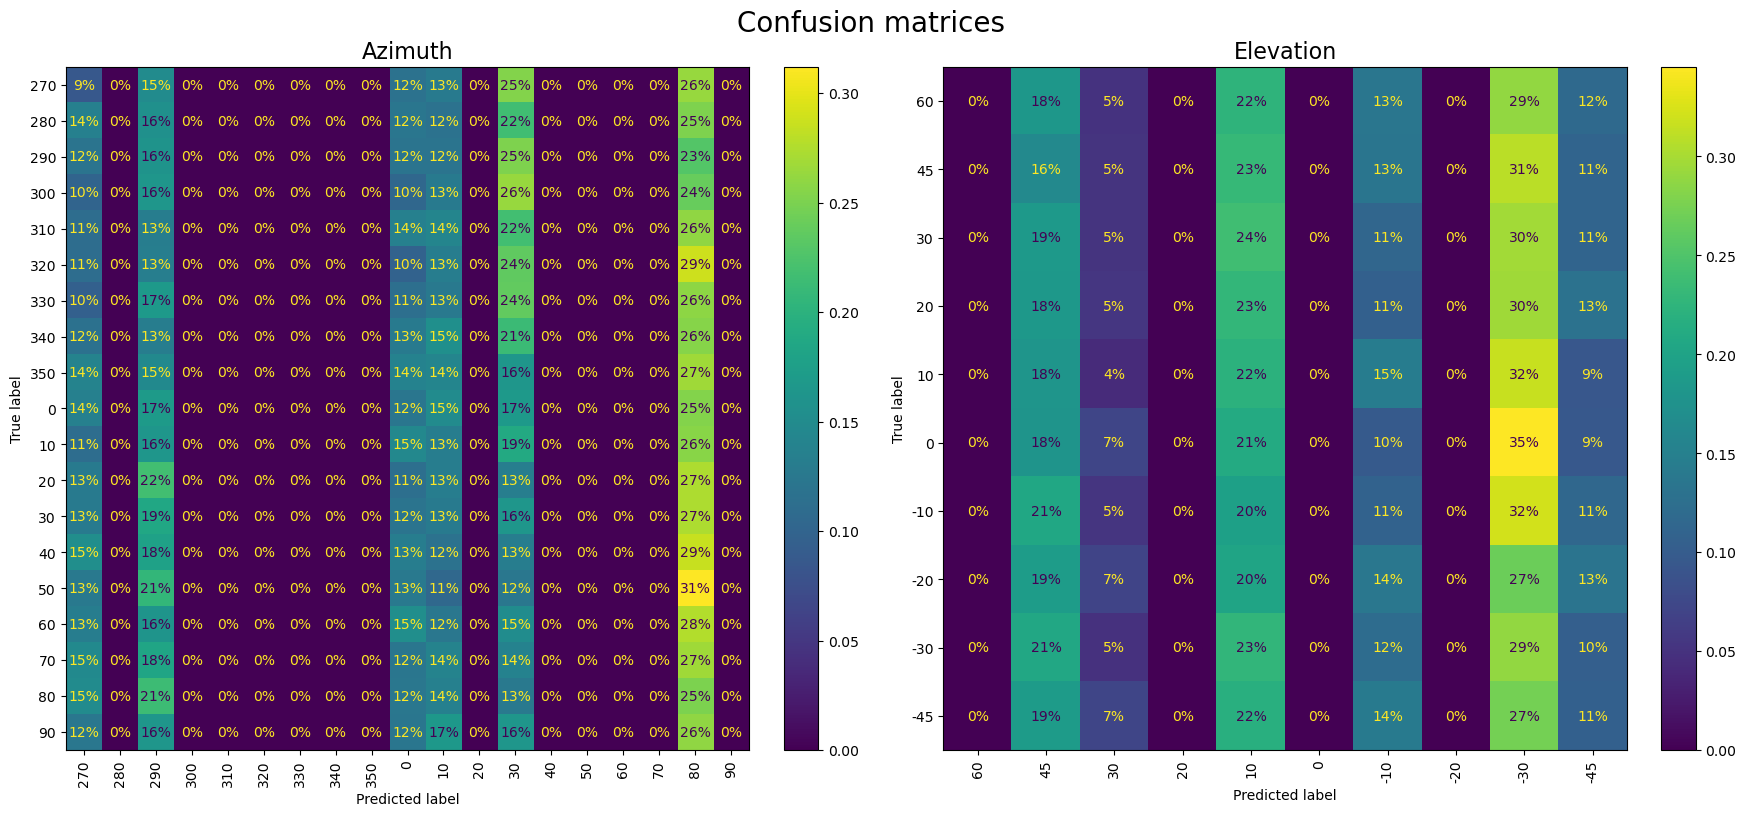

In [2]:
pred = np.load('./final_predictions/goodEpoch_SingleSource.npz')['arr_0'] #one-hot-encoded lists of the probabilities for each label
pred_labels, prob_labels = max_class_pred(pred)#only take labels and their probability of predicted label (probability not used finally)
true = np.load('name_labels_final_test_single.npz')['arr_1']
true_labels = true[:pred.shape[0]] # make sure the predictions.size == trues.size because batch size gives modulo>0

confusion_matrices(true_labels, pred_labels)